<a href="https://colab.research.google.com/github/Philocreation/My_Machine_Learning/blob/main/Template/Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

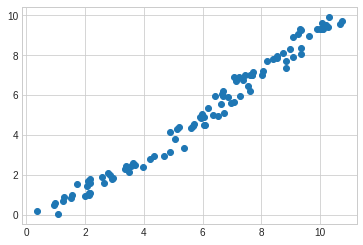

In [ ]:
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100,1)) + noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("선형 회귀 가충치 = {}".format(model.coef_))
print("선형 회귀 편향 = {}".format(model.intercept_))

선형 회귀 가충치 = [1.01731661]
선형 회귀 편향 = -0.9496154343949001


In [ ]:
print("학습 데이터 점수 = {}".format(model.score(X_train,y_train)))
print("테스트 데이터 점수 = {}".format(model.score(X_test,y_test)))

학습 데이터 점수 = 0.9807647683689855
테스트 데이터 점수 = 0.9734597456382689


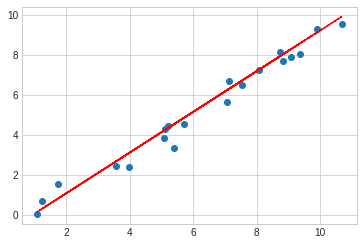

In [ ]:
predict = model.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,predict,'--r')

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [ ]:
boston_df.describe()

CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

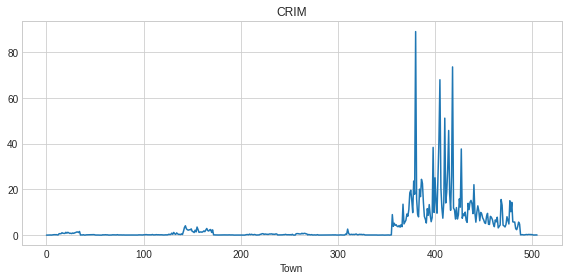

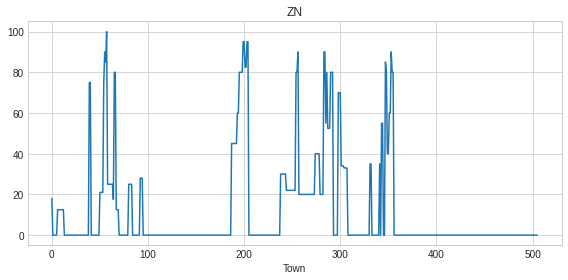

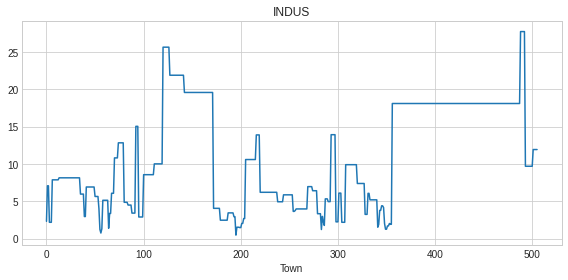

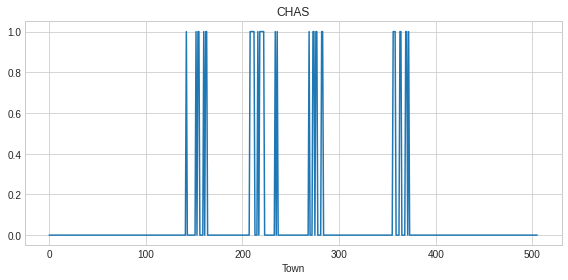

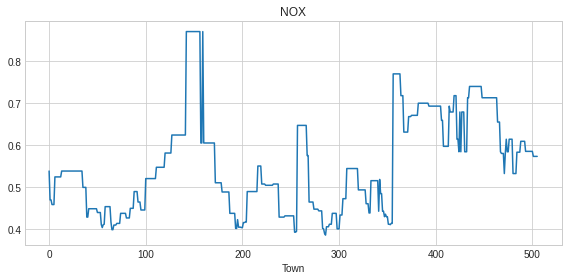

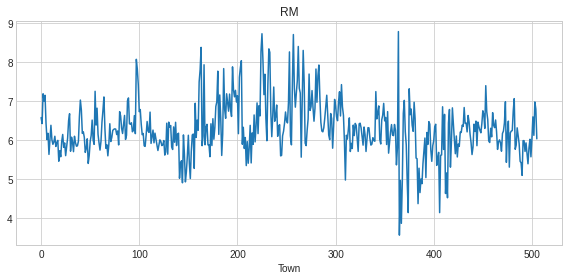

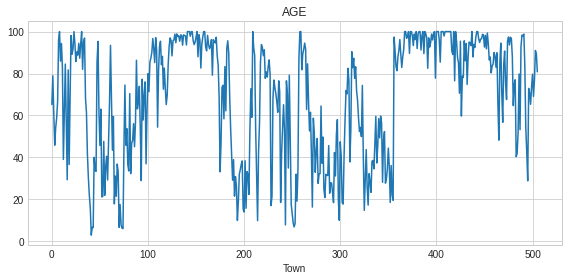

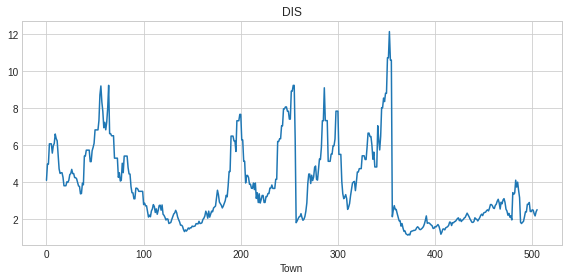

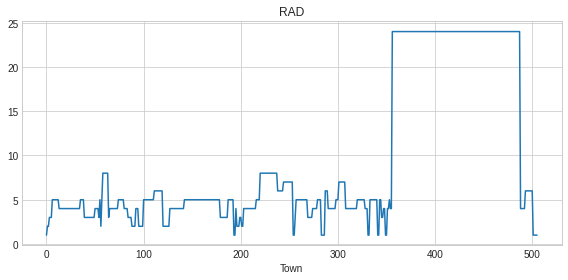

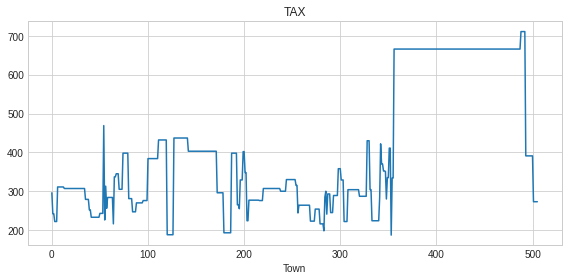

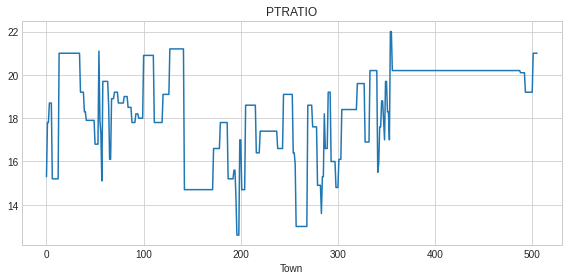

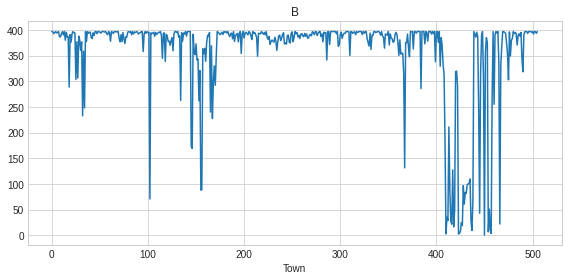

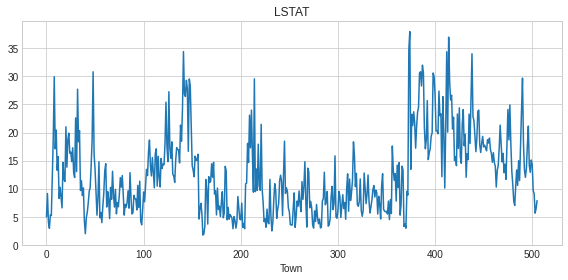

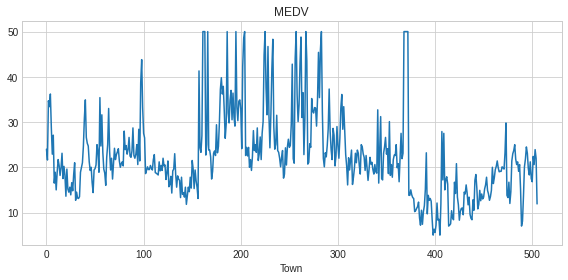

In [ ]:
for i, col in enumerate(boston_df.columns):
  plt.figure(figsize=(8,4))
  plt.plot(boston_df[col])
  plt.title(col)
  plt.xlabel('Town')
  plt.tight_layout()

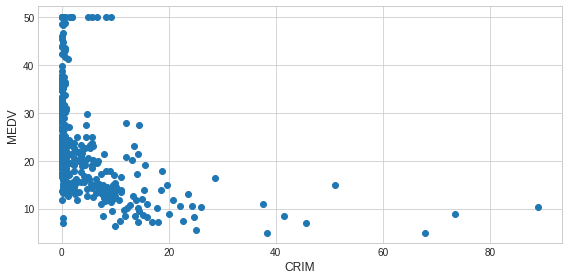

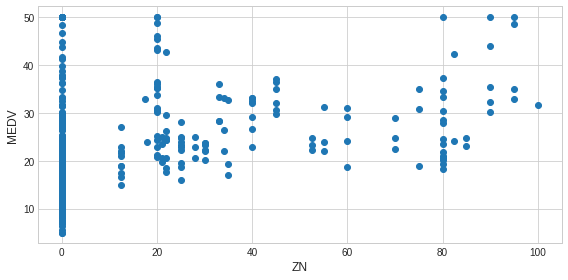

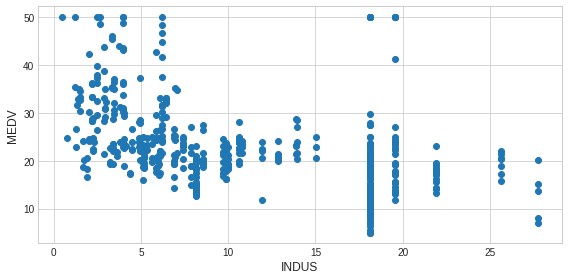

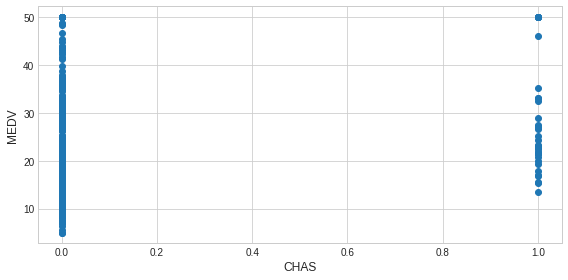

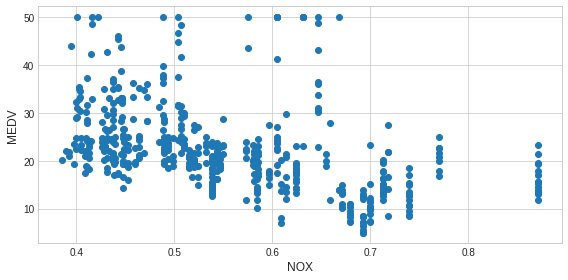

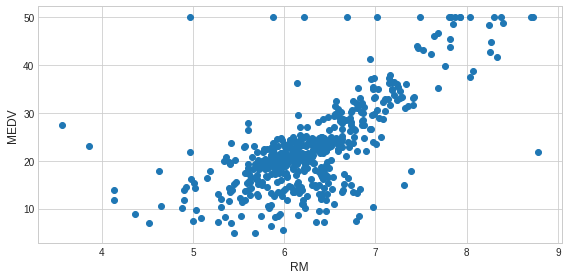

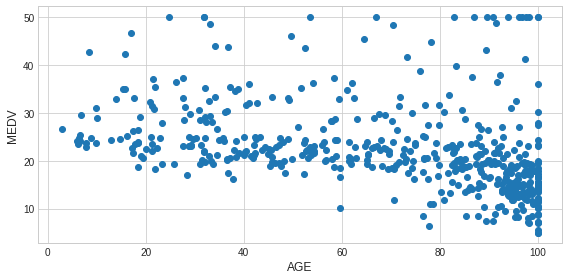

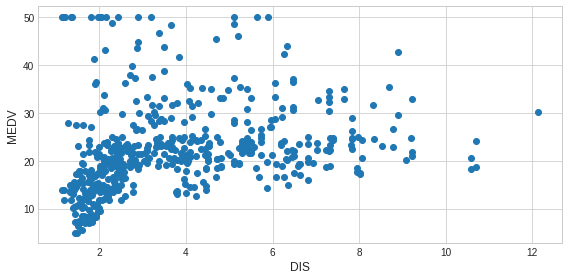

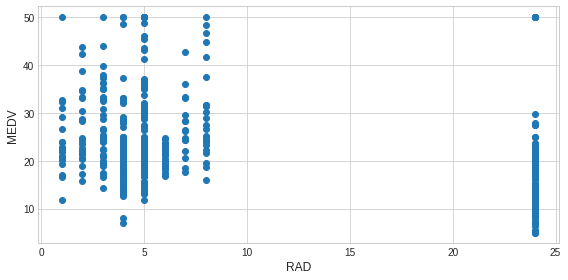

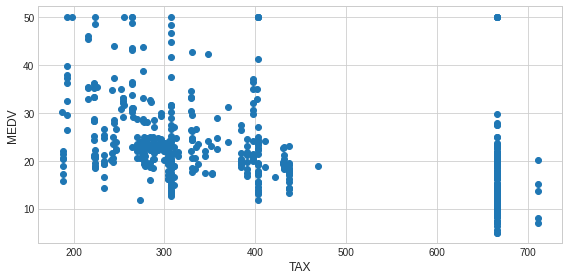

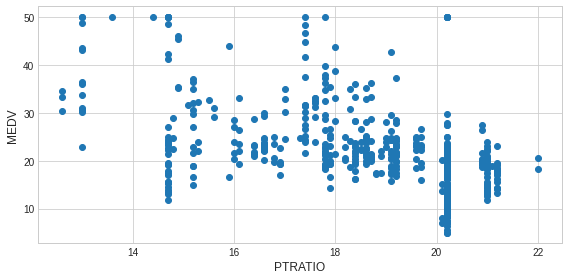

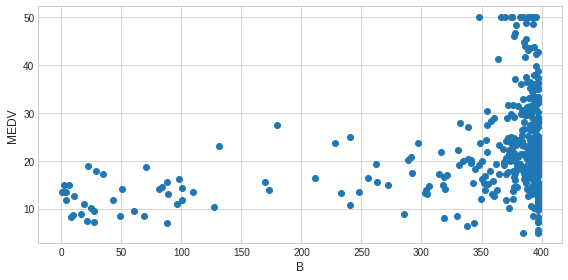

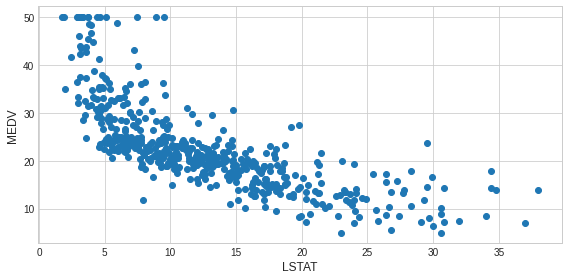

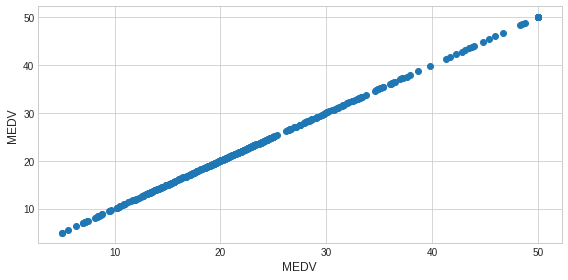

In [ ]:
for i, col in enumerate(boston_df.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(boston_df[col], boston_df['MEDV'])
  plt.ylabel('MEDV', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

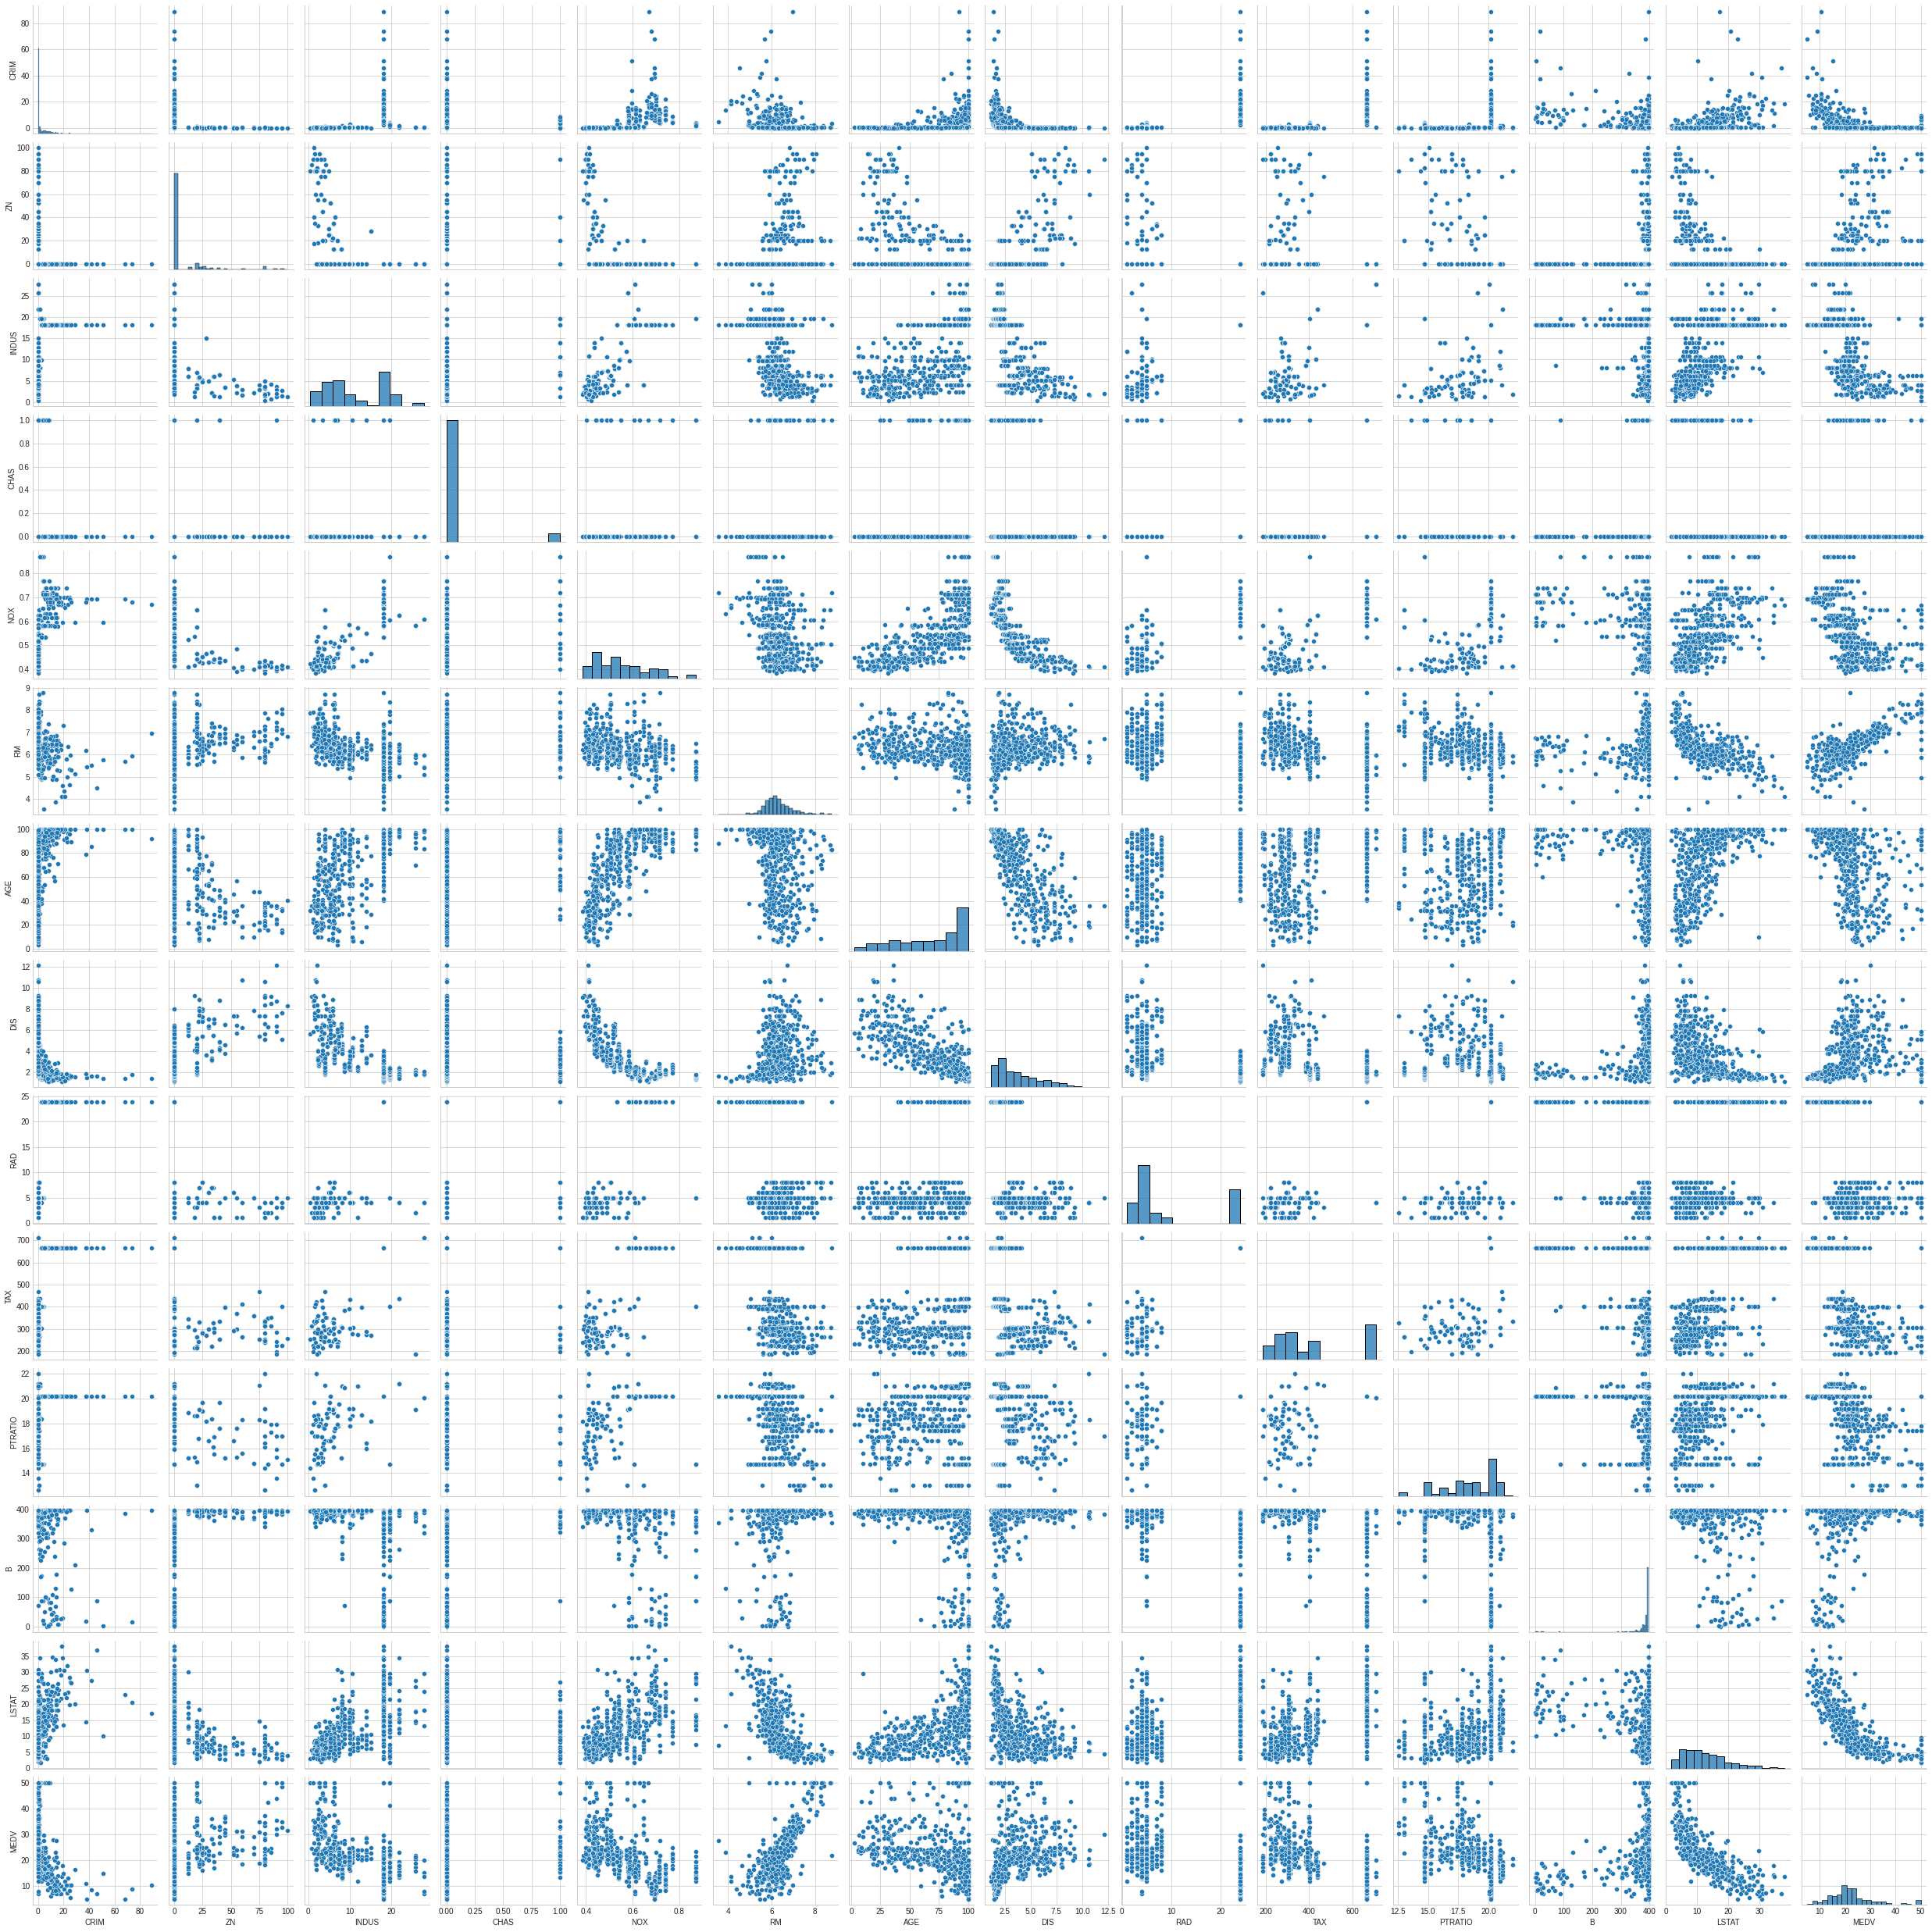

In [ ]:
import seaborn as sns

sns.pairplot(boston_df);

# 보스턴 주택 가격에 대한 선형 회귀 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
#normalization = True 를 쓰면 경고먹는다 해결방법을 찾아야 할듯(밑에 방법은 고려중) 
#model = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_df, boston.target, test_size=0.2)

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("학습 데이터 점수= {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수= {}".format(model.score(X_test,y_test)))

학습 데이터 점수= 1.0
평가 데이터 점수= 1.0


* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [ ]:
from sklearn.model_selection import cross_val_score

scores  = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
print("NeMSE score= {}".format(scores))
print("NeMSE score mean= {}".format(scores.mean()))
print("NeMSE score std= {}".format(scores.std()))

NeMSE score= [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
NeMSE score mean= -34.70525594452491
NeMSE score std= 45.57399920030867


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [ ]:
r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')

print("R2 scores= {}".format(r2_scores))
print("R2 scores mean= {}".format(r2_scores.mean()))
print("R2 scores std= {}".format(r2_scores.std()))

R2 scores= [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
R2 scores mean= 0.2025289900605586
R2 scores std= 0.5952960169512366


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [ ]:
print('y = ' + str(model.intercept_)+' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

y = 3.552713678800501e-14 
8.630536589385776e-16 * x0
-8.673617379884035e-17 * x1
1.5070410197548512e-17 * x2
-2.5012738936818456e-15 * x3
-1.9560887604781405e-15 * x4
-1.914728141663713e-15 * x5
5.117434254131581e-17 * x6
1.3597792596770075e-15 * x7
-1.2620113287731272e-16 * x8
3.469446951953614e-18 * x9
1.8163096894563413e-16 * x10
-1.0755285551056204e-16 * x11
-2.8406096919120216e-16 * x12
1.0000000000000002 * x13


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE = {}'.format(rmse))
print('R2 Score = {}'.format(r2))

RMSE = 1.2334853795465032e-14
R2 Score = 1.0


In [25]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE = {}'.format(rmse))
print('R2 Score = {}'.format(r2))

RMSE = 1.5007839827952773e-14
R2 Score = 1.0


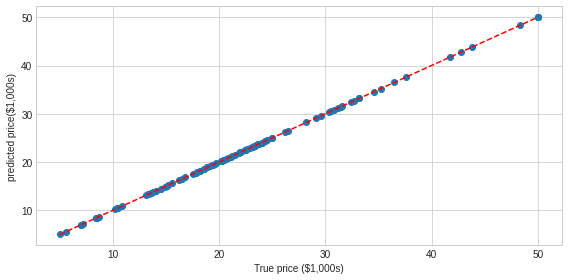

In [26]:
def plot_boston_prices(sxpected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5,50],[5,50],'--r')
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('predicted price($1,000s)')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

## 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 평균 방 수 |
| AveBedrms | 평균 침실 수 |
| Population | 블록 내 거주중인 인구수 |
| AveOccup | 평균 주택 점유율 |
| Latitude | 주택 블록 위도 |
| Longitude | 주택 블록 경도  |

In [27]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [29]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target']=california.target
california_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Target
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25   3.422

[5 rows x 9 columns]

In [30]:
california_df.describe()

MedInc      HouseAge  ...     Longitude        Target
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]

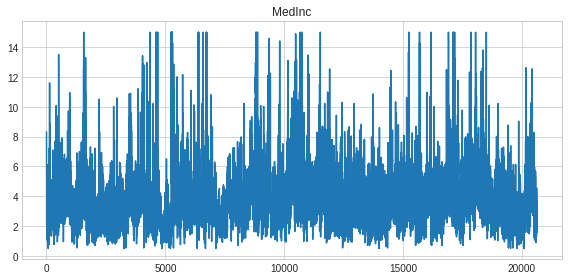

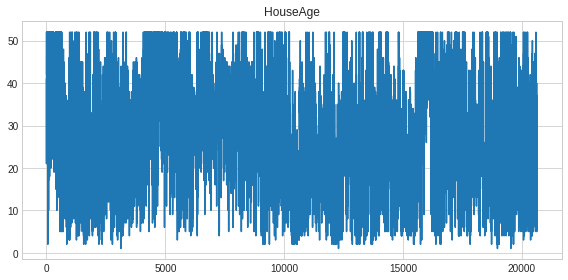

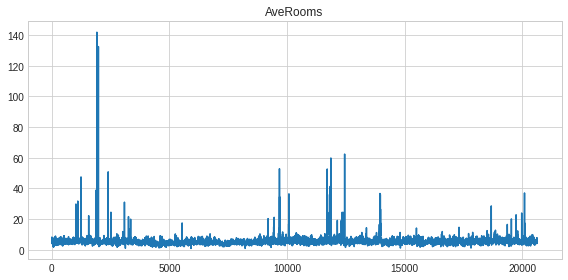

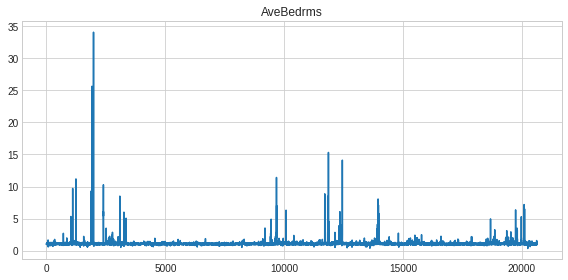

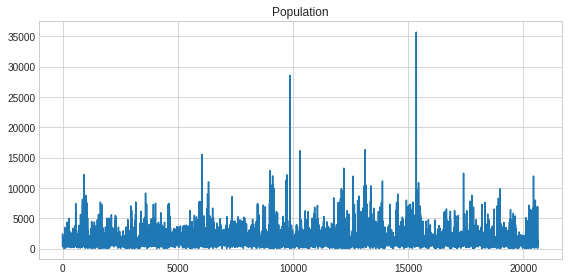

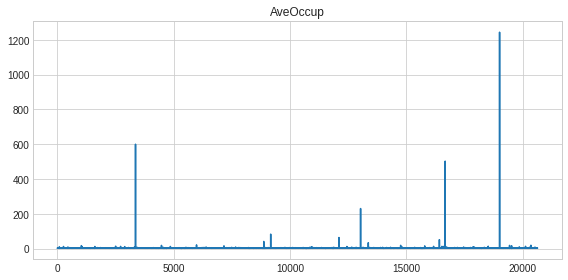

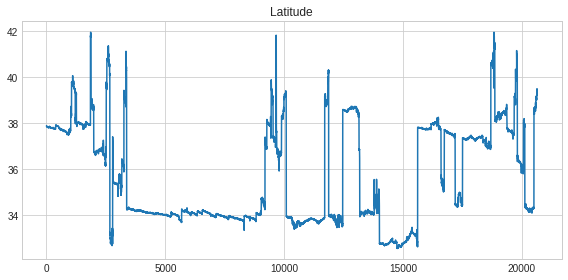

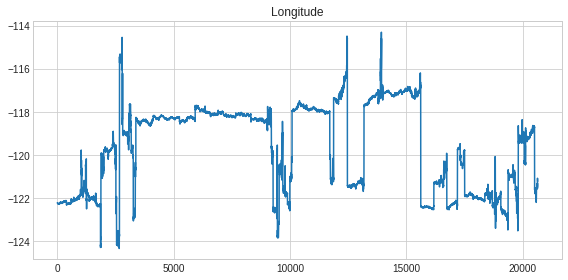

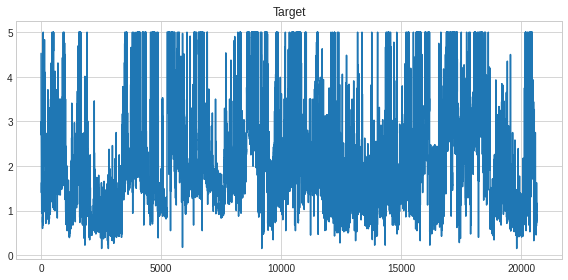

In [33]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,4))
  plt.plot(california_df[col])
  plt.title(col)
  plt.tight_layout()

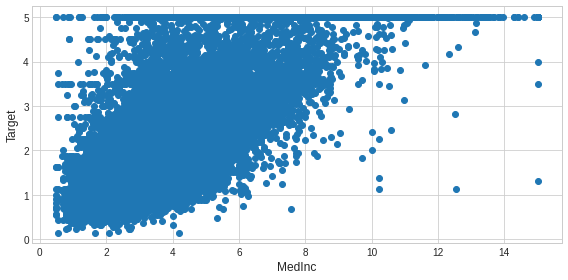

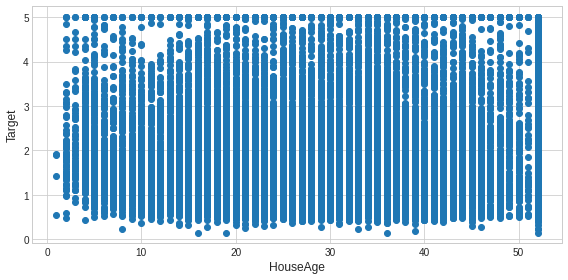

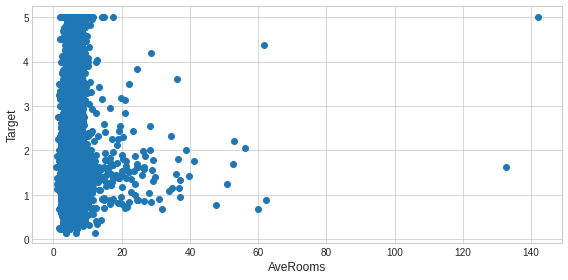

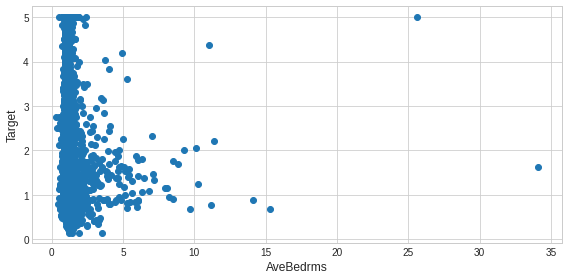

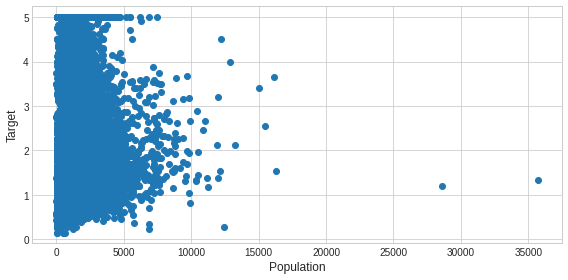

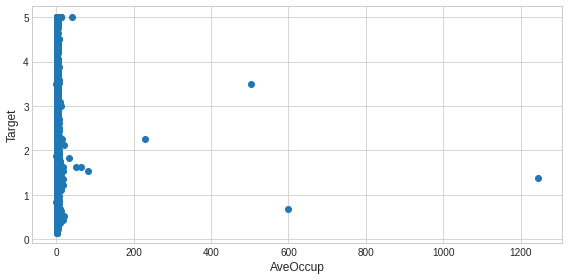

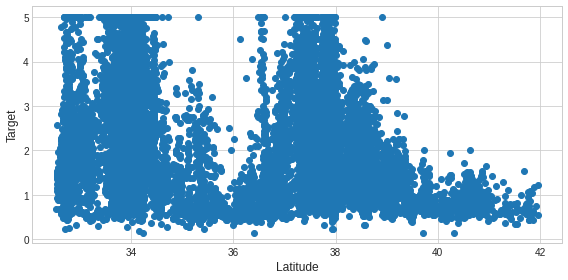

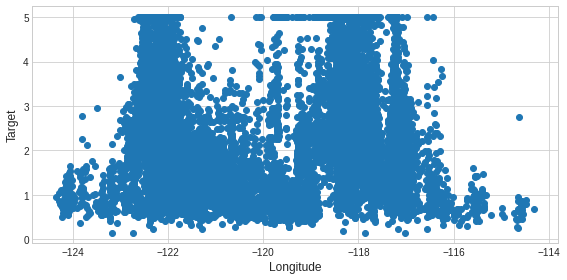

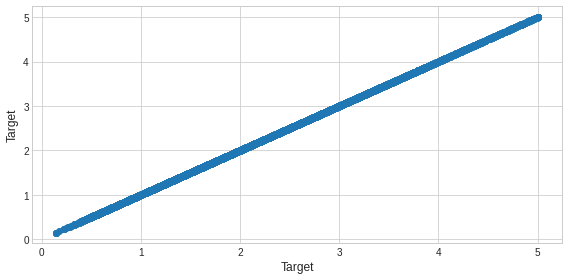

In [34]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(california_df[col], california_df['Target'])
  plt.ylabel('Target', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

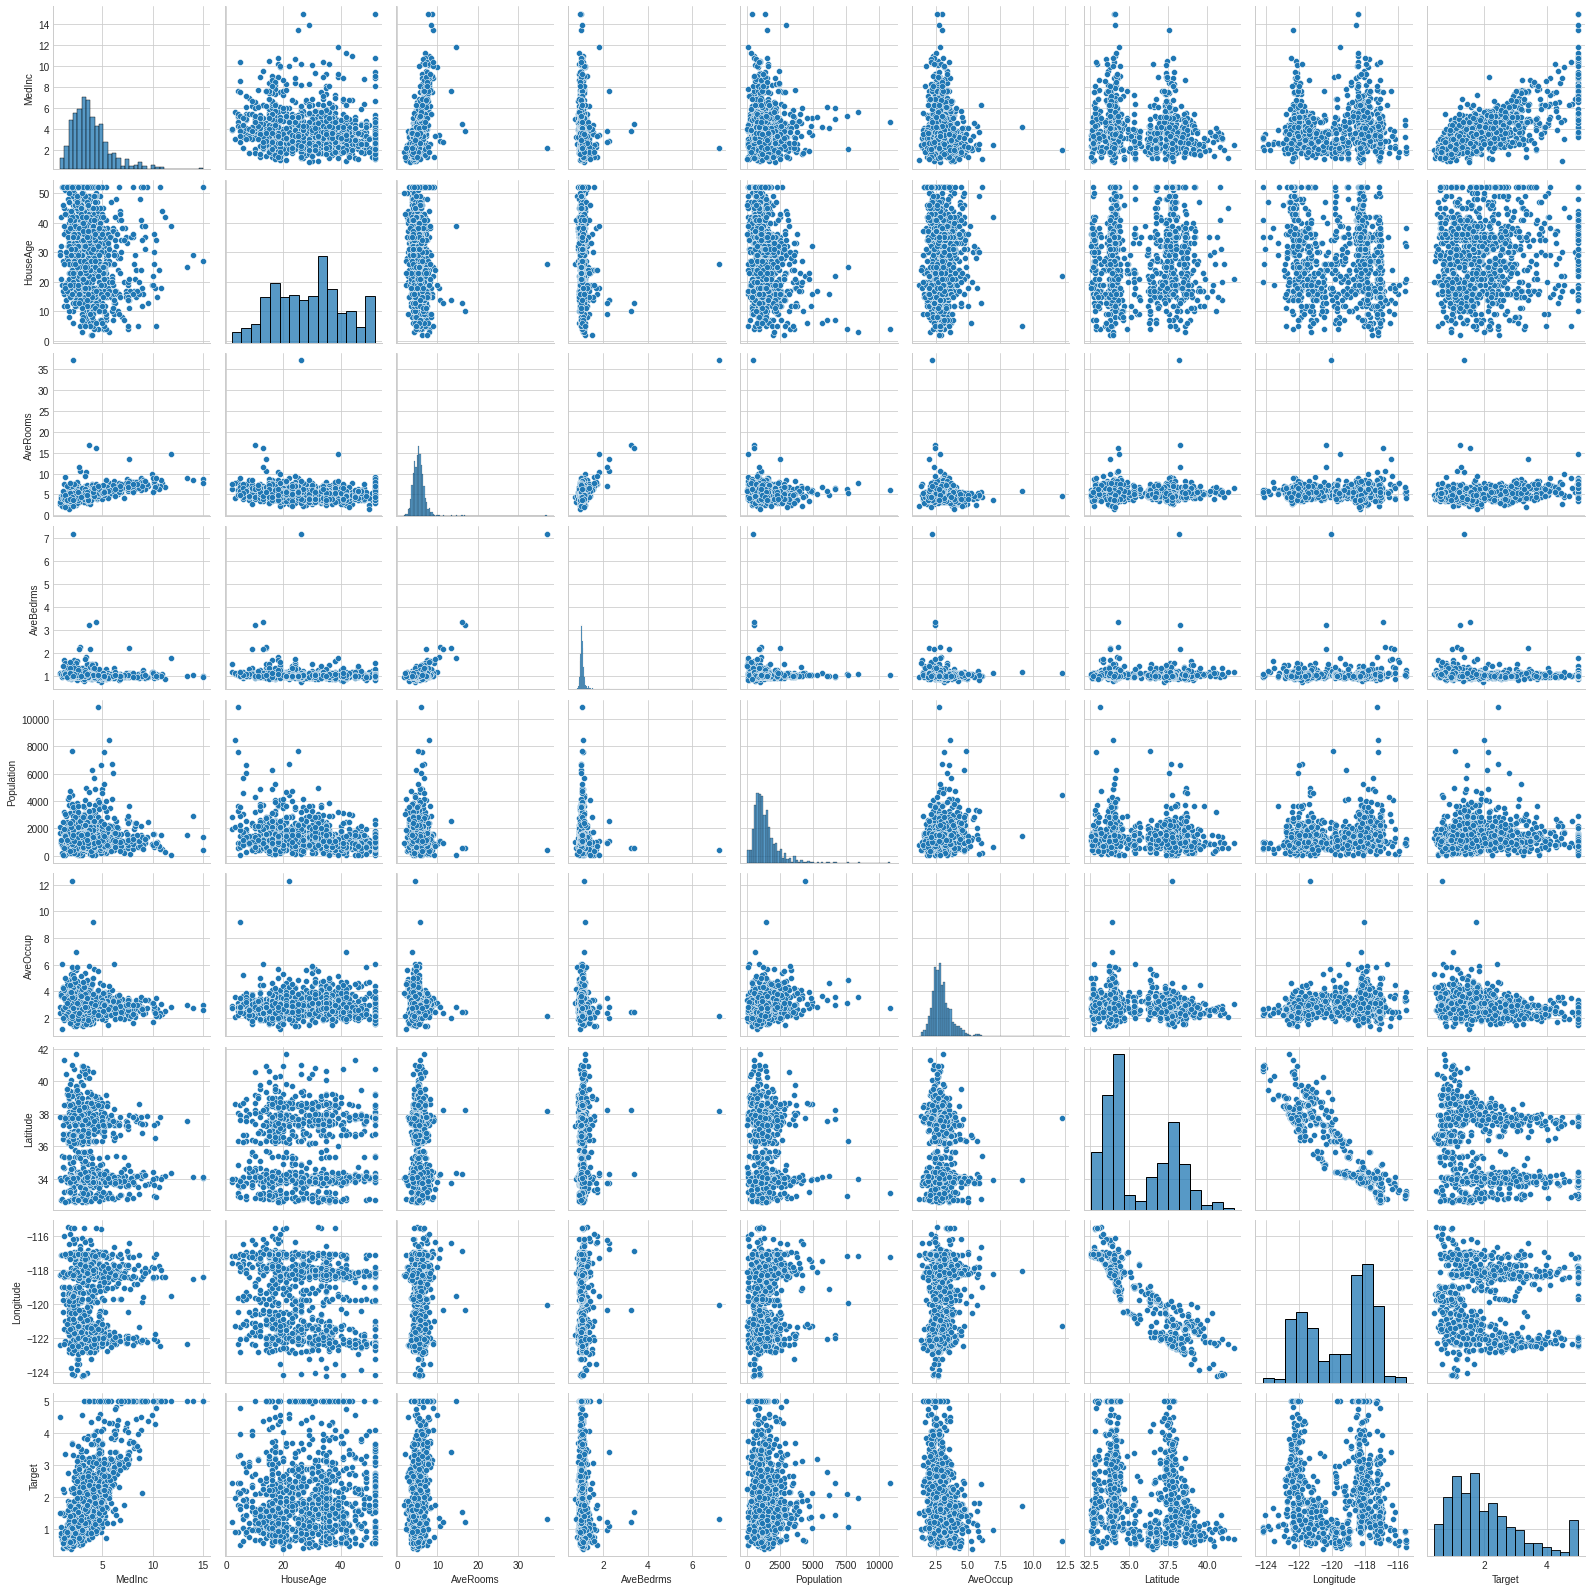

In [35]:
import seaborn as sns

sns.pairplot(california_df.sample(1000));

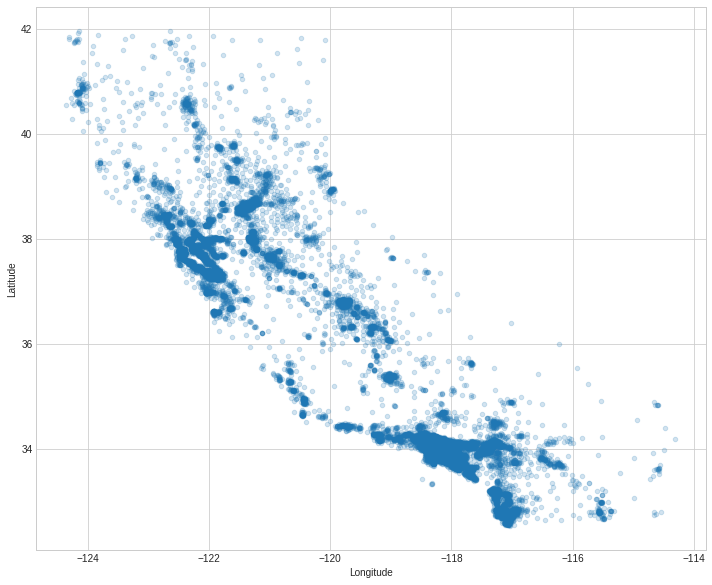

In [38]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10));

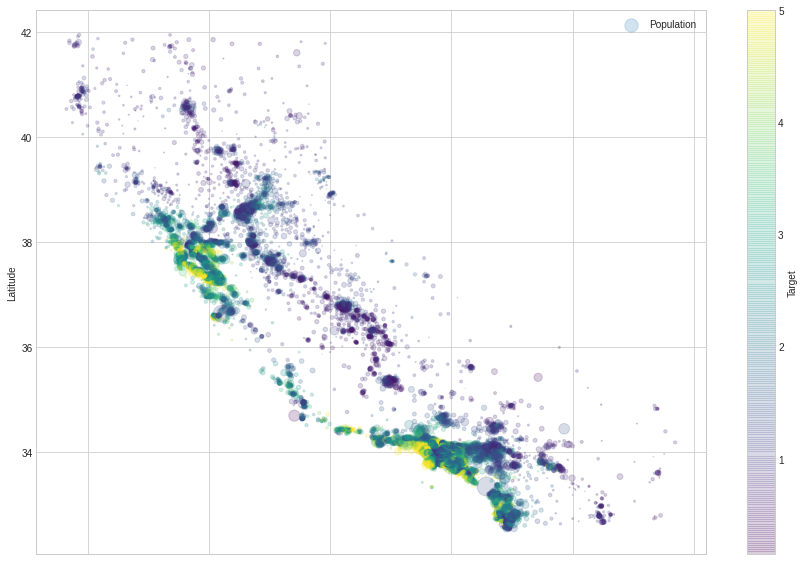

In [40]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, 
                   s=california_df['Population']/100, label='Population', figsize=(15, 10),
                   c = 'Target', cmap=plt.get_cmap('viridis'), colorbar=True);

## 캘리포니아 주택 가격에 대한 선형 회귀 

In [47]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train,y_train)
print('학습 데이터 점수 = {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 = {}'.format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring='neg_mean_squared_error')
print('NMSE mean ={}'.format(scores.mean()))
print('NMSE std ={}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring='r2')
print('r2 Score mean ={}'.format(r2_scores.mean()))



학습 데이터 점수 = 0.6091582020187687
평가 데이터 점수 = 0.5776577146347837
NMSE mean =-0.5509524296956628
NMSE std =0.19288582953864977
r2 Score mean =0.5110068610523778


In [49]:
print('y = '+str(model.intercept_)+' ')
for i, c in enumerate(model.coef_):
  print(str(c)+'*x'+str(i))

y = -37.342770017829125 
0.442104050320636*x0
0.009542756779509002*x1
-0.11528896415666552*x2
0.7721700379559773*x3
-3.6977050176141557e-07*x4
-0.008626609916092806*x5
-0.4237284757686957*x6
-0.43772186971710486*x7


In [53]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train,y_train_predict)

print('RMSE = {}'.format(rmse))
print('R2 Score = {}'.format(r2))

RMSE = 0.7220721574359662
R2 Score = 0.6091582020187687


In [54]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test,y_test_predict)

print('RMSE = {}'.format(rmse))
print('R2 Score = {}'.format(r2))

RMSE = 0.7471132345389597
R2 Score = 0.5776577146347837


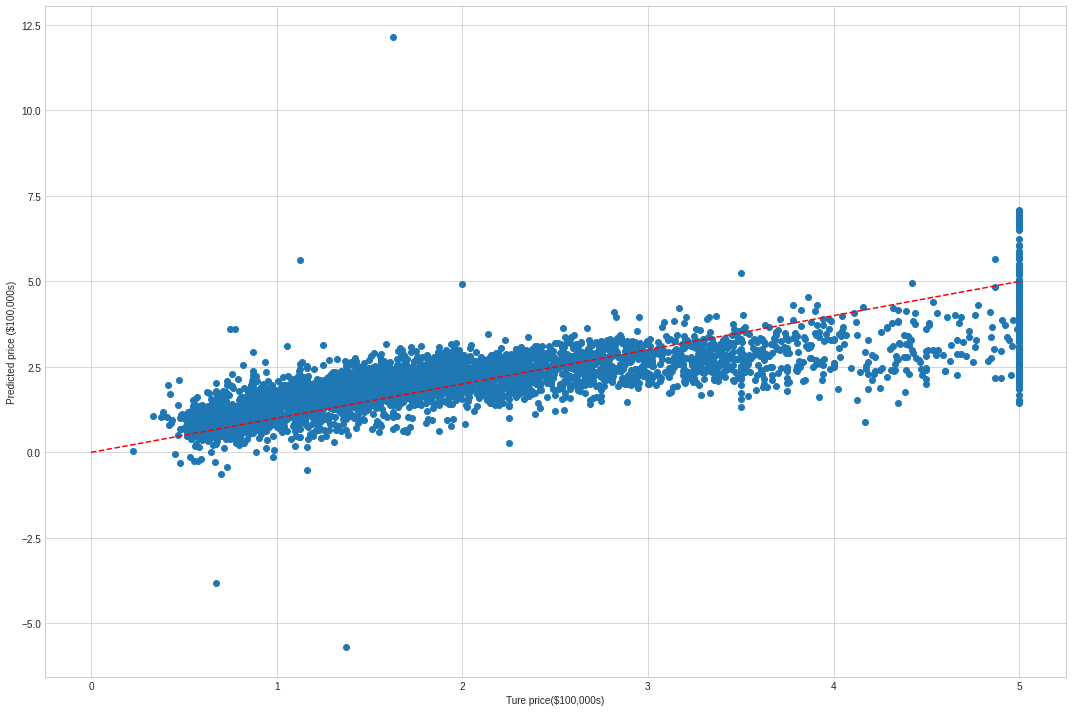

In [59]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize=(15,10))
  plt.scatter(expected,predicted)
  plt.plot([0,5],[0,5],'--r')
  plt.xlabel('Ture price($100,000s)')
  plt.ylabel('Predicted price ($100,000s)')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected,predicted)